PLANT DISEASE

In [3]:
import numpy as np
import pandas as pd 
import os

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import img_to_array

In [11]:
!kaggle datasets download -d emmarex/plantdisease

 99% 648M/658M [00:04<00:00, 162MB/s]
100% 658M/658M [00:05<00:00, 135MB/s]


In [12]:
!unzip /content/plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [13]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [14]:
os.chdir('/content/plant')
if os.path.isdir('/content/plant/train') is False:
    os.makedirs('/content/plant/train/Pepper__bell___Bacterial_spot')
    os.makedirs('/content/plant/train/Pepper__bell___healthy')
    os.makedirs('/content/plant/train/Potato___Early_blight')
    os.makedirs('/content/plant/train/Potato___Late_blight')
    os.makedirs('/content/plant/train/Tomato_Bacterial_spot')
    os.makedirs('/content/plant/train/Tomato_Early_blight')
    os.makedirs('/content/plant/train/Tomato_healthy')
    os.makedirs('/content/plant/train/Tomato_Late_blight')
    os.makedirs('/content/plant/train/Tomato_Leaf_Mold')
    os.makedirs('/content/plant/train/Tomato_Septoria_leaf_spot')
    os.makedirs('/content/plant/train/Tomato_Spider_mites_Two_spotted_spider_mite')
    os.makedirs('/content/plant/train/Tomato__Target_Spot')
    os.makedirs('/content/plant/train/Tomato__Tomato_YellowLeaf__Curl_Virus')
    os.makedirs('/content/plant/test/Pepper__bell___Bacterial_spot')
    os.makedirs('/content/plant/test/Pepper__bell___healthy')
    os.makedirs('/content/plant/test/Potato___Early_blight')
    os.makedirs('/content/plant/test/Potato___Late_blight')
    os.makedirs('/content/plant/test/Tomato_Bacterial_spot')
    os.makedirs('/content/plant/test/Tomato_Early_blight')
    os.makedirs('/content/plant/test/Tomato_healthy')
    os.makedirs('/content/plant/test/Tomato_Late_blight')
    os.makedirs('/content/plant/test/Tomato_Leaf_Mold')
    os.makedirs('/content/plant/test/Tomato_Septoria_leaf_spot')
    os.makedirs('/content/plant/test/Tomato_Spider_mites_Two_spotted_spider_mite')
    os.makedirs('/content/plant/test/Tomato__Target_Spot')
    os.makedirs('/content/plant/test/Tomato__Tomato_YellowLeaf__Curl_Virus')
    os.makedirs('/content/plant/valid/Pepper__bell___Bacterial_spot')
    os.makedirs('/content/plant/valid/Pepper__bell___healthy')
    os.makedirs('/content/plant/valid/Potato___Early_blight')
    os.makedirs('/content/plant/valid/Potato___Late_blight')
    os.makedirs('/content/plant/valid/Tomato_Bacterial_spot')
    os.makedirs('/content/plant/valid/Tomato_Early_blight')
    os.makedirs('/content/plant/valid/Tomato_healthy')
    os.makedirs('/content/plant/valid/Tomato_Late_blight')
    os.makedirs('/content/plant/valid/Tomato_Leaf_Mold')
    os.makedirs('/content/plant/valid/Tomato_Septoria_leaf_spot')
    os.makedirs('/content/plant/valid/Tomato_Spider_mites_Two_spotted_spider_mite')
    os.makedirs('/content/plant/valid/Tomato__Target_Spot')
    os.makedirs('/content/plant/valid/Tomato__Tomato_YellowLeaf__Curl_Virus')

In [15]:
import glob
import shutil
import random
names=['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot','Tomato__Tomato_YellowLeaf__Curl_Virus']
lst=[]
for i in names:
    lst.append(len(os.listdir('/content/plantvillage/PlantVillage/'+i)))


In [16]:
f=0
c=0
for i in range(0,13):
    for x in range(0,lst[f]):
        if(c<=500):
            shutil.copy('/content/plantvillage/PlantVillage/'+names[f]+'/'+os.listdir('/content/plantvillage/PlantVillage/'+names[f])[x],'/content/plant/train/'+names[f])
            c=c+1
        elif (c>500 and c<=700):
            c=c+1
            shutil.copy('/content/plantvillage/PlantVillage/'+names[f]+'/'+os.listdir('/content/plantvillage/PlantVillage/'+names[f])[x],'/content/plant/valid/'+names[f])
        elif (c>700 and c<800):
            c=c+1
            shutil.copy('/content/plantvillage/PlantVillage/'+names[f]+'/'+os.listdir('/content/plantvillage/PlantVillage/'+names[f])[x],'/content/plant/test/'+names[f])
    f=f+1
    c=0

In [17]:
names
labels=[]
for i in range (0,13):
    labels.append(i)

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50
pretrained_model=tf.keras.applications.ResNet50(input_shape=(224,224,3),
                         include_top=False,
                         weights="imagenet")
for layer in pretrained_model.layers:
    layer.trainable=False

94773248/94765736 [==============================] - 1s 0us/step


In [19]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
last_layer=pretrained_model.get_layer('conv5_block3_3_conv')
last_output=last_layer.output
last_output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_3_conv')>

In [29]:
train_data=tf.keras.preprocessing.image_dataset_from_directory('/content/plant/train',image_size=(224,224),color_mode="rgb",
    batch_size=15,
    shuffle=True,
    seed=123)
valid_data=tf.keras.preprocessing.image_dataset_from_directory('/content/plant/valid',image_size=(224,224),color_mode="rgb",
    batch_size=15,
    shuffle=True,
    seed=123)

Found 6513 files belonging to 13 classes.
Found 2600 files belonging to 13 classes.
Found 1287 images belonging to 13 classes.


In [32]:
name=train_data.class_names

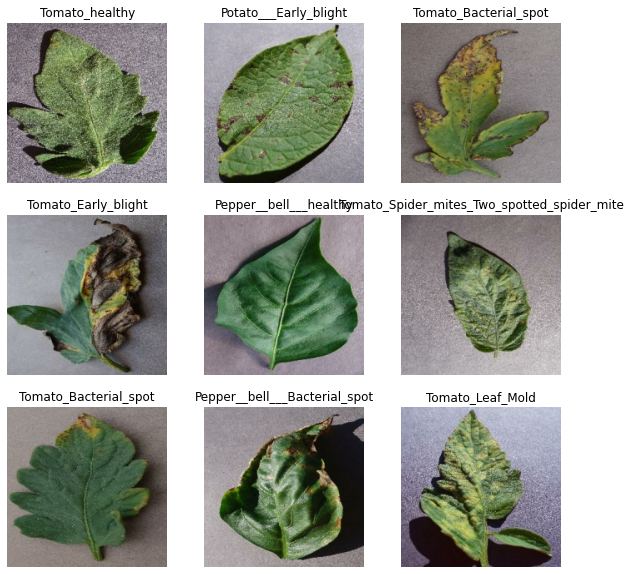

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(15, 224, 224, 3)
(15,)


In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_data= train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [57]:
num_classes = 13

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.fit(train_data,
                    epochs = 10,
                    validation_data = valid_data)

Epoch 1/10
435/435 [==============================] - 28s 16ms/step - loss: 4.4225 - accuracy: 0.3817 - val_loss: 1.1336 - val_accuracy: 0.6192
Epoch 2/10
435/435 [==============================] - 7s 16ms/step - loss: 0.9407 - accuracy: 0.6903 - val_loss: 0.9561 - val_accuracy: 0.6777
Epoch 3/10
435/435 [==============================] - 7s 16ms/step - loss: 0.6465 - accuracy: 0.7789 - val_loss: 0.6621 - val_accuracy: 0.7769
Epoch 4/10
435/435 [==============================] - 7s 16ms/step - loss: 0.4619 - accuracy: 0.8420 - val_loss: 0.7114 - val_accuracy: 0.7681
Epoch 5/10
435/435 [==============================] - 7s 16ms/step - loss: 0.3133 - accuracy: 0.8951 - val_loss: 0.6665 - val_accuracy: 0.7923
Epoch 6/10
435/435 [==============================] - 7s 16ms/step - loss: 0.2269 - accuracy: 0.9223 - val_loss: 0.8685 - val_accuracy: 0.7669
Epoch 7/10
435/435 [==============================] - 7s 16ms/step - loss: 0.1435 - accuracy: 0.9519 - val_loss: 0.8080 - val_accuracy: 0.797

**TRANSFER LEARNING MODEL**

In [64]:
from tensorflow.keras import Model
num=13
model=keras.layers.Flatten()(last_output)
model=keras.layers.Dense(64,activation='relu')(model)
model=keras.layers.Dense(num)(model)
main=Model(pretrained_model.input,model)

In [66]:
main.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
main.fit(train_data,
                    epochs = 10,
                    validation_data = valid_data)

Epoch 1/10
435/435 [==============================] - 32s 69ms/step - loss: 1.9756 - accuracy: 0.3287 - val_loss: 1.3941 - val_accuracy: 0.4992
Epoch 2/10
435/435 [==============================] - 29s 66ms/step - loss: 1.0728 - accuracy: 0.6214 - val_loss: 0.9731 - val_accuracy: 0.6600
Epoch 3/10
435/435 [==============================] - 29s 66ms/step - loss: 0.7624 - accuracy: 0.7305 - val_loss: 0.9057 - val_accuracy: 0.6850
Epoch 4/10
435/435 [==============================] - 29s 67ms/step - loss: 0.6188 - accuracy: 0.7821 - val_loss: 0.8445 - val_accuracy: 0.7208
Epoch 5/10
435/435 [==============================] - 29s 66ms/step - loss: 0.5066 - accuracy: 0.8305 - val_loss: 0.7984 - val_accuracy: 0.7362
Epoch 6/10
435/435 [==============================] - 29s 66ms/step - loss: 0.4347 - accuracy: 0.8529 - val_loss: 0.7624 - val_accuracy: 0.7519
Epoch 7/10
435/435 [==============================] - 29s 66ms/step - loss: 0.3751 - accuracy: 0.8795 - val_loss: 0.7435 - val_accuracy:

**TESTING THE TEST DATASET**

In [83]:
img = keras.preprocessing.image.load_img('/content/plant/test/Pepper__bell___Bacterial_spot/01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG', target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = main.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [85]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Pepper__bell___Bacterial_spot with a 99.83 percent confidence.
